# Quant Course: Lesson 7
## Binomial Tree Model

# Agenda:

* Tree numerical method, example
* Pricing formula
* Implementation
* Application: American and Bermudan options
* Coding
* Summary, comparison to other numerical methods
* Exercises

# The Tree method

## Recap

* Geometric Brownian motion

* European option: payoff $ \;\;\; max\lbrace S_T-K, 0\rbrace $

* American option
    * Same parameters as European option
    * Can be excercised anytime before expiry $T$:
        * Payoff at excercise time
    * Q: Which one is more valuable, European or American?

## Basic concept of binomial tree model
* Discrete steps, price goes up or down randomly
* Risk-free alternative is government bond

$$ d < 1 + r < u $$

<img src="./img/tree-notation.png" style="margin-left:auto; margin-right:auto; margin-top: 50px; width: 1200px;" />

## Basic concept of binomial tree model (cont.)

* One or more steps
    * one step model can be calibrated to a single European contract
    * more steps needed for more complicated contracts (e.g. American)
* With increasing number of steps it converges to log-normal, but this is not our main objective
* Literature: Steven Shreve: Stochastic Calculus for Finance I.

## Evolution of spot tree: code snippet

<img src="./img/spot_tree_code.png" style="margin-left:auto; margin-right:auto; margin-top: 150px; width: 1800px;" />

## Example: pricing European option with one-step tree

<img src="./img/1-step-example.png" style="margin-left:auto; margin-right:auto; margin-top: 150px; width: 1800px;" />

### Arbitrage free price of option

$\textbf{time step}$| $\textbf{draw}$ | $\textbf{bond} \hspace{10px}$ | $\textbf{stock}$ | $\textbf{call option}$ |
--------------:|----:|----:|----:|----:|
$0$|$\emptyset$|$-100$|$-20$|$V_0$
$1$|$U$|$103$|$22$|$1$
$1$|$D$|$103$|$18$|$0$

Q: What is the basic idea?

Can we replicate the cashflows of the option using bonds and stock?

$ S_1(U)-S_1(D) = 4 (V_1(U) - V_1(D)) $

We need to hold $ \Delta_0 = 1/4 $ number of stocks to replicate (Delta-hedging rule)

time step| draw | $\text{bond} \hspace{10px}$  |  $1/4$ stock  | $\text{option} \hspace{10px}$ |
---:|---:|---:|---:|---:|
$0$|$\emptyset$|$\approx 4.37$|$-5$|$V_0\approx 0.63$
$1$|$U$|$-4.5$|$5.5$|$1$
$1$|$D$|$-4.5$|$4.5$|$0$

Q: Where did we use $p$ and $q$?

# Price formula

## One step

$ V_0 = \frac{1}{1+r}(\tilde{p}\ V_1(U) + \tilde{q}\ V_1(D)) $ and

$ \Delta_0 = \frac{V_1(U) - V_1(D)}{S_1(U) - S_1(D)} $

where

$ \tilde{p} =  \frac{1+r-d}{u-d}$,  $ \tilde{q} = 1 - \tilde{p} $

Q: Where do the formulas depend on the strike $K$?

$\{ \tilde{p}, \tilde{q}\}$ is called the Risk-neutral measure

$ V_0 = \frac{1}{1+r}\tilde{E}(V_1) $

Q: Why do we call it "Risk-neutral measure"?

## Multi-step

  $ V_n = \frac{1}{1+r}\tilde{E}(V_{n+1} \mid \mathcal{F}_n) $
  
  $ \Delta_n = \frac{V_{n+1}(\dots U) - V_{n+1}(\dots D)}{S_{n+1}(\dots U) - S_{n+1}(\dots D)}$
  
  $\text{ for } \ n = N-1,\dots,0$

Therefore:

$ V_0 = \frac{1}{(1+r)^N}\tilde{E}(V_N) $

# Implementation

Two trees:

* Spot tree: $S_{t,i}$ is the $i^{th}$ value of the time $t$ level of the spot simulation tree. $t = 0, \dots, N,\ i = 0, \dots, t$.

<img src="./img/2-step.png" style="margin-left:auto; margin-right:auto; margin-top: 50px; width: 600px;" />

* (Conditional) price tree: same dimensions, $V_{t,i} = \tilde{E}(V_N \mid S_t = S_{t,i}) $

* Backward solution for price tree (based on multi-step formula)

## Evolution of price tree: code snippets

Leaves:
<img src="./img/price_tree_leaves_European.png" style="margin-left:auto; margin-right:auto; margin-top: 10px; width: 1800px;" />

Backward steps:
<img src="./img/price_tree_code_European.png" style="margin-left:auto; margin-right:auto; margin-top: 10px; width: 1800px;" />

## American
How to modify the implementation for Americn contracts?

Spot tree? No change

Price tree?

* Solve backwards again
  * We track continuation values (i.e. condition on it was not exercised before)
  * Each step we need to decide if we exercise or not
    * Intrinsic value of option in a node of the tree: gain realized if excercised immediately
    * So how do we decide? Optimal choice: exercise if

$$ \text{Intrinsic value} > \text{expected continuation value} $$

# Time to play a bit with the code...

# Summary and discussion

* $ V_0 = \tilde{E}(V_N) $, $ V_n = \tilde{E}(V_N \mid \mathcal{F}_n) $

* To replicate we need to achieve:

  $ \Delta_n(S_{n+1}(\dots U) - S_{n+1}(\dots D)) = V_{n+1}(\dots U) - V_{n+1}(\dots D) $

* Q: what are the advantages/disadvantages of Tree compared to Analytic Black-Scholes?

  * Runtime: analytic is faster to calibrate and run

  * Path dependency: tree allows for the payoff to depend on market states before expiry (e.g. American contract)

  * Q: how does Tree compare to PDE/MC?

# Exercises

* Implement calibrator for Tree
* Implement pricer for up-and-out Barrier options

# Literature
* Steven Shreve: Stochastic Calculus and Finance I.
* Mark S. Joshi: C++ Design Patterns and Derivatives Pricing

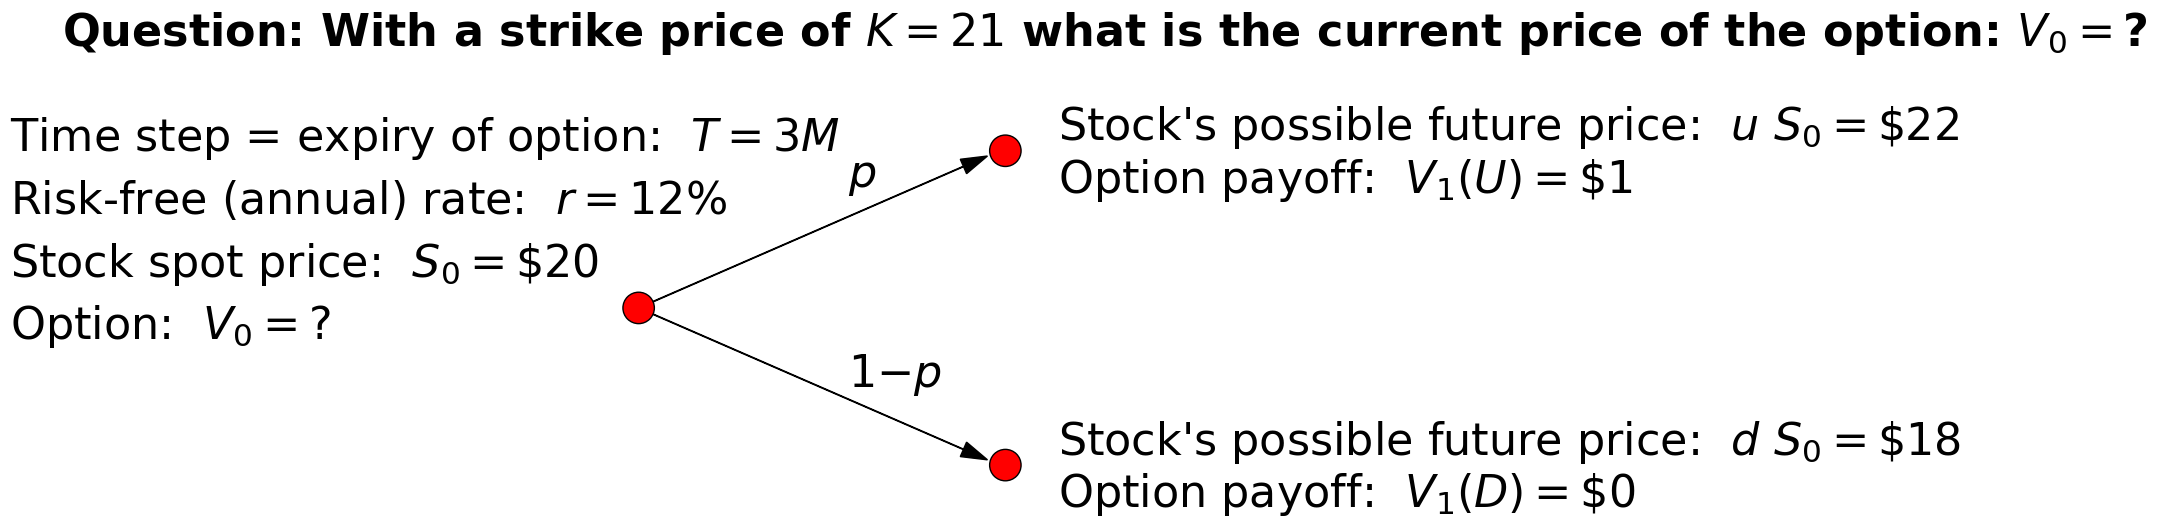

In [16]:
# === Image and text. No computation. ===

# Based on: Hull book Chapter 11, goo.gl/is8Y4S

# Importing libraries, Definitions
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 32

# A little graph with two arrows
circle_0 = Circle((.2,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_down = Circle((.9,.7), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_up = Circle((.9,.1), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_up)
ax.add_artist(circle_down)
ax.arrow(.2, .4, .66, .3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .66, -.3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.2, .4, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')

# Text around the little graph
ax.text(-.9, .9, r'Question: With a strike price of $K=21$ what is the current price of the option: $V_0 = $?', fontsize=my_fontsize, fontweight='bold')
ax.text(-1.0, .7, r'Time step = expiry of option: $\ T = 3M$', fontsize=my_fontsize)
ax.text(-1.0, .58, r'Risk-free (annual) rate: $\ r = 12\%$', fontsize=my_fontsize)
ax.text(-1.0, .46, r'Stock spot price: $\ S_0 = \$20$', fontsize=my_fontsize)
ax.text(-1.0, .34, r'Option: $\ V_0 = ?$', fontsize=my_fontsize)
ax.text(1., .72, r"Stock's possible future price: $\ u\ S_0 = \$22$", fontsize=my_fontsize)
ax.text(1., .62, r'Option payoff: $\ V_1(U) = \$1$', fontsize=my_fontsize)
ax.text(1., .12, r"Stock's possible future price: $\ d\ S_0 = \$18$", fontsize=my_fontsize)
ax.text(1., .02, r'Option payoff: $\ V_1(D) = \$0$', fontsize=my_fontsize)
ax.text(.6, .63, r'$p$', fontsize=my_fontsize)
ax.text(.6, .25, r'$1\minus p$', fontsize=my_fontsize)

# # More text below the little graph
# x2,y2 = .1,-.3
# ax.text(x2,y2, r'Reply: Replicate a (C) call option with', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2,y2-.1, r'$\Delta$ amount of the (S) underlying stock and (R) risk-free borrowing', fontsize=my_fontsize)
# ax.text(x2, y2-.24, r'C = R + $\Delta\ $S', fontsize=my_fontsize)
# ax.text(x2-.43, y2-.35, r'$\ \ \ \Rightarrow\ \ \ $C$\ \minus$ $\Delta$ S = R', fontsize=my_fontsize)
# ax.text(x2, y2-.62, r'We are searching for the risk-neutral solution, thus:', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2, y2-.75, r'(1) $\ $C $\minus\ \Delta\ $S$\ $ should have same price in the two end nodes:', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.87, r'In the example: $\ 22\ \Delta\ \minus\ 1 = 18\ \Delta\ \ \ \Rightarrow\ \ \ $ $\Delta=0.25$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.97, r'General case: $\ \Delta=\left(f_u-f_d\right)\ /\ \left(S_0\ u-S_0\ d\right)$', fontsize=my_fontsize)
# ax.text(x2, y2-1.12, r'(2) $\ $C $\minus\ \Delta\ $S$\ $ and $\ R\ $ should change identically (risk-free rate):', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.24, r'In the example: $\ 20\ \Delta\ \minus\ f = \left(\ 22\ \Delta\ - 1\ \right)\ \exp( -r\ T\ )$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.36, r'General case:', fontsize=my_fontsize)
# ax.text(x2+.35, y2-1.48, r'where', fontsize=my_fontsize)
# ax.text(x2+.6, y2-1.36, r'$\ f = \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right] \ \exp( -r\ T\ )$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.48, r'$\ p = \left[\ \exp(\ r\ T\ ) - d\ \right]\ / \ \left[\ u - d \ \right] $', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.58, r'$\ f_d = \max\left(\ 0, d\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.68, r'$\ f_u = \max\left(\ 0, u\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')

# ax.text(x2, y2-1.92, r'Think about the following:', fontsize=my_fontsize, fontweight='bold', color='#a00000')
# ax.text(x2, y2-2.02, r'What do the following special cases mean for the', fontsize=my_fontsize)
# ax.text(x2, y2-2.12, r'time evolution of the price of the underlying stock ?', fontsize=my_fontsize)
# ax.text(x2, y2-2.26, r'(1) $u=1/d$ and $p=1/2$', fontsize=my_fontsize)
# ax.text(x2, y2-2.38, r'(2) $u\ d = exp\left(\ r\ T\ \right)$  and  $p=1/2$  ', fontsize=my_fontsize)

plt.show() # display the entire plot

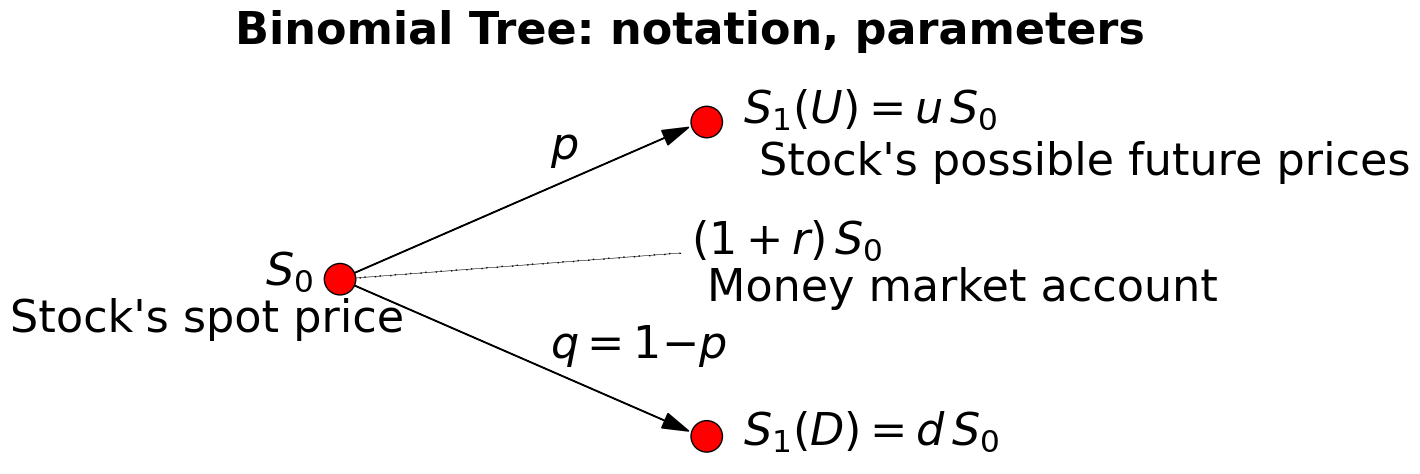

In [33]:
# === Image and text. No computation. ===

# Based on: Hull book Chapter 11, goo.gl/is8Y4S

# Importing libraries, Definitions
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 32

# A little graph with two arrows
circle_0 = Circle((.2,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_down = Circle((.9,.7), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_up = Circle((.9,.1), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_up)
ax.add_artist(circle_down)
ax.arrow(.2, .4, .66, .3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .66, -.3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.2, .4, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')

# Text around the little graph
ax.text(0.0, .85, r'Binomial Tree: notation, parameters', fontsize=my_fontsize, fontweight='bold')
ax.text(0.03, .39, r'$\ S_0$', fontsize=my_fontsize)
ax.text(-.43, .3, r"Stock's spot price", fontsize=my_fontsize)
ax.text(0.97, .7, r"$S_1(U) = u\,S_0$", fontsize=my_fontsize)
ax.text(1.0, .6, r"Stock's possible future prices", fontsize=my_fontsize)
ax.text(0.97, .085, r"$S_1(D) = d\,S_0$", fontsize=my_fontsize)
ax.text(.6, .63, r'$p$', fontsize=my_fontsize)
ax.text(.6, .25, r'$q = 1\minus p$', fontsize=my_fontsize)

ax.arrow(.2, .4, .65, 0.05, fc='k', ec='k', head_width=0.0, head_length=0.0, linestyle=(0, (1,10)))
ax.text(0.87, .45, r"$(1+r)\,S_0$", fontsize=my_fontsize)
ax.text(0.9, .36, r"Money market account", fontsize=my_fontsize)

# # More text below the little graph
# x2,y2 = .1,-.3
# ax.text(x2,y2, r'Reply: Replicate a (C) call option with', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2,y2-.1, r'$\Delta$ amount of the (S) underlying stock and (R) risk-free borrowing', fontsize=my_fontsize)
# ax.text(x2, y2-.24, r'C = R + $\Delta\ $S', fontsize=my_fontsize)
# ax.text(x2-.43, y2-.35, r'$\ \ \ \Rightarrow\ \ \ $C$\ \minus$ $\Delta$ S = R', fontsize=my_fontsize)
# ax.text(x2, y2-.62, r'We are searching for the risk-neutral solution, thus:', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2, y2-.75, r'(1) $\ $C $\minus\ \Delta\ $S$\ $ should have same price in the two end nodes:', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.87, r'In the example: $\ 22\ \Delta\ \minus\ 1 = 18\ \Delta\ \ \ \Rightarrow\ \ \ $ $\Delta=0.25$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.97, r'General case: $\ \Delta=\left(f_u-f_d\right)\ /\ \left(S_0\ u-S_0\ d\right)$', fontsize=my_fontsize)
# ax.text(x2, y2-1.12, r'(2) $\ $C $\minus\ \Delta\ $S$\ $ and $\ R\ $ should change identically (risk-free rate):', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.24, r'In the example: $\ 20\ \Delta\ \minus\ f = \left(\ 22\ \Delta\ - 1\ \right)\ \exp( -r\ T\ )$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.36, r'General case:', fontsize=my_fontsize)
# ax.text(x2+.35, y2-1.48, r'where', fontsize=my_fontsize)
# ax.text(x2+.6, y2-1.36, r'$\ f = \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right] \ \exp( -r\ T\ )$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.48, r'$\ p = \left[\ \exp(\ r\ T\ ) - d\ \right]\ / \ \left[\ u - d \ \right] $', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.58, r'$\ f_d = \max\left(\ 0, d\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.68, r'$\ f_u = \max\left(\ 0, u\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')

# ax.text(x2, y2-1.92, r'Think about the following:', fontsize=my_fontsize, fontweight='bold', color='#a00000')
# ax.text(x2, y2-2.02, r'What do the following special cases mean for the', fontsize=my_fontsize)
# ax.text(x2, y2-2.12, r'time evolution of the price of the underlying stock ?', fontsize=my_fontsize)
# ax.text(x2, y2-2.26, r'(1) $u=1/d$ and $p=1/2$', fontsize=my_fontsize)
# ax.text(x2, y2-2.38, r'(2) $u\ d = exp\left(\ r\ T\ \right)$  and  $p=1/2$  ', fontsize=my_fontsize)

plt.show() # display the entire plot

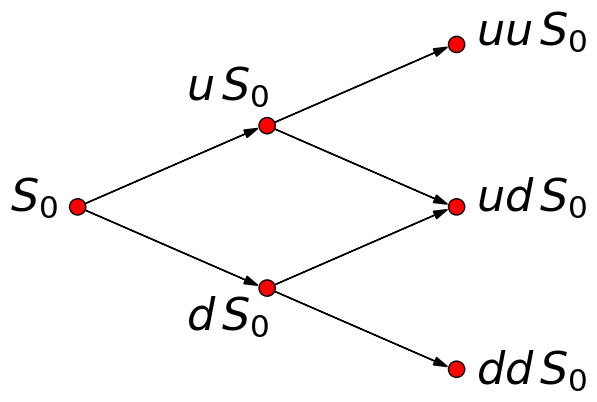

In [30]:
# === Image and text. No computation. ===

# Based on: Hull book Chapter 11, goo.gl/is8Y4S

# Importing libraries, Definitions
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 32

# A little graph with two arrows
circle_0 = Circle((.2,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_down = Circle((.9,.7), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_up = Circle((.9,.1), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_downdown = Circle((1.6,1.0), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_upup = Circle((1.6,-0.2), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_mid = Circle((1.6,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_up)
ax.add_artist(circle_down)
ax.add_artist(circle_upup)
ax.add_artist(circle_downdown)
ax.add_artist(circle_mid)
ax.arrow(.2, .4, .66, .3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .66, -.3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.2, .4, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.2, .4, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')

ax.arrow(.9, .7, .66, .3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.9, .1, .66, -.3, head_width=.03, head_length=.05, fc='1', ec='1')
ax.arrow(.9, .7, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.9, .1, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.9, .7, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.9, .1, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')

# Text around the little graph
ax.text(-0.05, .39, r'$S_0$', fontsize=my_fontsize)
ax.text(0.6, .8, r"$u\,S_0$", fontsize=my_fontsize)
ax.text(0.6, -0.05, r"$d\,S_0$", fontsize=my_fontsize)
ax.text(1.67, .39, r'$ud\,S_0$', fontsize=my_fontsize)
ax.text(1.67, 1.0, r"$uu\,S_0$", fontsize=my_fontsize)
ax.text(1.67, -0.25, r"$dd\,S_0$", fontsize=my_fontsize)

# # More text below the little graph
# x2,y2 = .1,-.3
# ax.text(x2,y2, r'Reply: Replicate a (C) call option with', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2,y2-.1, r'$\Delta$ amount of the (S) underlying stock and (R) risk-free borrowing', fontsize=my_fontsize)
# ax.text(x2, y2-.24, r'C = R + $\Delta\ $S', fontsize=my_fontsize)
# ax.text(x2-.43, y2-.35, r'$\ \ \ \Rightarrow\ \ \ $C$\ \minus$ $\Delta$ S = R', fontsize=my_fontsize)
# ax.text(x2, y2-.62, r'We are searching for the risk-neutral solution, thus:', fontsize=my_fontsize, fontweight='bold')
# ax.text(x2, y2-.75, r'(1) $\ $C $\minus\ \Delta\ $S$\ $ should have same price in the two end nodes:', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.87, r'In the example: $\ 22\ \Delta\ \minus\ 1 = 18\ \Delta\ \ \ \Rightarrow\ \ \ $ $\Delta=0.25$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-.97, r'General case: $\ \Delta=\left(f_u-f_d\right)\ /\ \left(S_0\ u-S_0\ d\right)$', fontsize=my_fontsize)
# ax.text(x2, y2-1.12, r'(2) $\ $C $\minus\ \Delta\ $S$\ $ and $\ R\ $ should change identically (risk-free rate):', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.24, r'In the example: $\ 20\ \Delta\ \minus\ f = \left(\ 22\ \Delta\ - 1\ \right)\ \exp( -r\ T\ )$', fontsize=my_fontsize)
# ax.text(x2+.1, y2-1.36, r'General case:', fontsize=my_fontsize)
# ax.text(x2+.35, y2-1.48, r'where', fontsize=my_fontsize)
# ax.text(x2+.6, y2-1.36, r'$\ f = \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right] \ \exp( -r\ T\ )$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.48, r'$\ p = \left[\ \exp(\ r\ T\ ) - d\ \right]\ / \ \left[\ u - d \ \right] $', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.58, r'$\ f_d = \max\left(\ 0, d\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')
# ax.text(x2+.6, y2-1.68, r'$\ f_u = \max\left(\ 0, u\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')

# ax.text(x2, y2-1.92, r'Think about the following:', fontsize=my_fontsize, fontweight='bold', color='#a00000')
# ax.text(x2, y2-2.02, r'What do the following special cases mean for the', fontsize=my_fontsize)
# ax.text(x2, y2-2.12, r'time evolution of the price of the underlying stock ?', fontsize=my_fontsize)
# ax.text(x2, y2-2.26, r'(1) $u=1/d$ and $p=1/2$', fontsize=my_fontsize)
# ax.text(x2, y2-2.38, r'(2) $u\ d = exp\left(\ r\ T\ \right)$  and  $p=1/2$  ', fontsize=my_fontsize)

plt.show() # display the entire plot